<a href="https://colab.research.google.com/github/rahiakela/audio-processing-research-and-practice/blob/main/think-dsp/01_sounds_and_signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Sounds and signals

A signal represents a quantity that varies in time, or space, or both.

Sound is variation in air
pressure. A sound signal represents variations in air pressure over time.

##Setup

In [ ]:
import os

if not os.path.exists('thinkdsp.py'):
  !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
from thinkdsp import CosSignal, SinSignal
from thinkdsp import decorate
from thinkdsp import play_wave
from thinkdsp import read_wave

import matplotlib.pyplot as plt
from IPython.display import Audio
from IPython.display import display
from ipywidgets import interact, fixed

##Periodic signals

Periodic signals, which are signals that repeat themselves after some
period of time.

For example, if you strike a bell, it vibrates and generates sound.

This signal resembles a sinusoid, which means it has the same shape as the trigonometric
sine function.

The frequency of a signal is the number of cycles per second, which is the inverse of
the period.

In [3]:
cos_sig = CosSignal(freq=440, amp=1.0, offset=0)
sin_sig = SinSignal(freq=880, amp=0.5, offset=0)

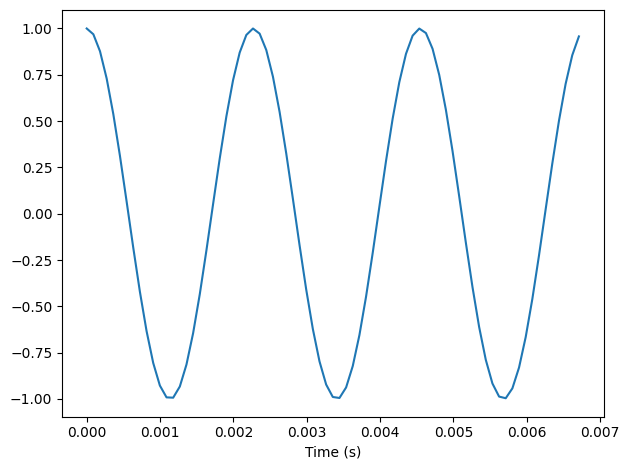

In [4]:
cos_sig.plot()
decorate(xlabel="Time (s)")

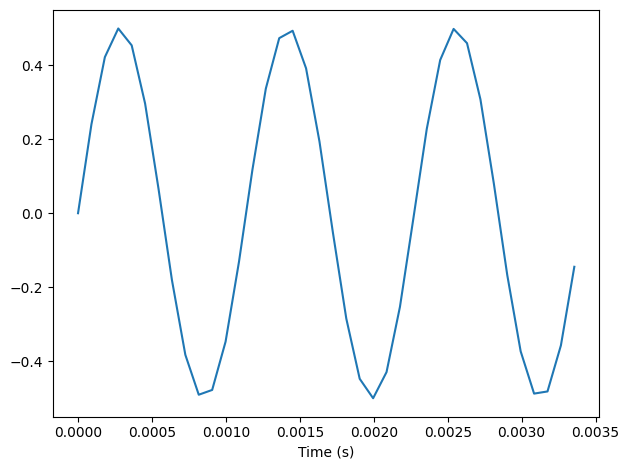

In [5]:
sin_sig.plot()
decorate(xlabel="Time (s)")

Notice that the frequency of the sine signal is doubled, so the period is halved.

The sum of two signals is a SumSignal.

In [6]:
mix_sig = sin_sig + cos_sig
mix_sig

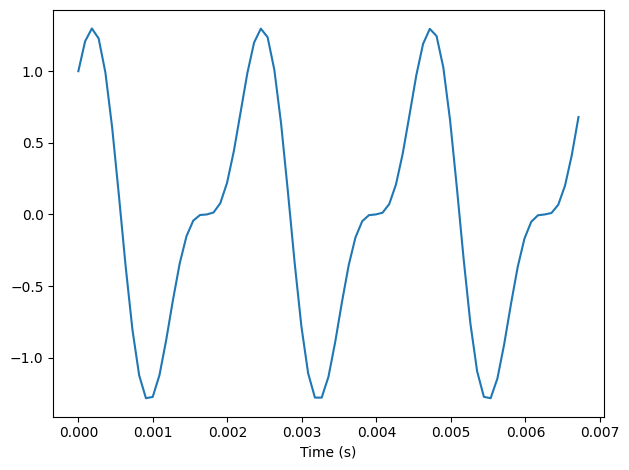

In [7]:
mix_sig.plot()
decorate(xlabel="Time (s)")

##Waveform

The shape of a periodic signal is called the waveform.

The shape of the waveform determines
the musical timbre, which is our perception of the quality of the sound.

A Signal represents a mathematical function defined for all values of time. If you evaluate a signal at a sequence of equally-spaced times, the result is a Wave. `framerate` is the number of samples per second.

In [8]:
wave = mix_sig.make_wave(duration=0.5, start=0, framerate=11025)
wave

In [9]:
# IPython provides an Audio widget that can play a wave.
audio = Audio(data=wave.ys, rate=wave.framerate)
audio

In [10]:
# Wave also provides make_audio(), which does the same thing
wave.make_audio()

The `ys` attribute is a NumPy array that contains the values from the signal. The interval between samples is the inverse of the framerate.

In [11]:
print(f"Number of samples {len(wave.ys)}")
print(f"Timestep in ms {1 / wave.framerate * 1000}")

Number of samples 5512
Timestep in ms 0.09070294784580499


Signal objects that represent periodic signals have a `period` attribute.

Wave provides `segment`, which creates a new wave. So we can pull out a 3 period segment of this wave.

In [12]:
period = mix_sig.period
segment = wave.segment(start=0, duration=period * 3)
period

0.0022727272727272726

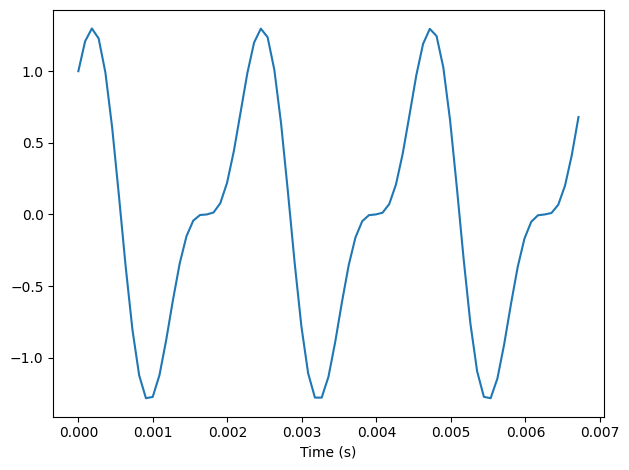

In [13]:
segment.plot()
decorate(xlabel="Time (s)")

`normalize` method scales a wave so the range doesn't exceed -1 to 1.

`apodize` method tapers the beginning and end of the wave so it doesn't click when you play it.

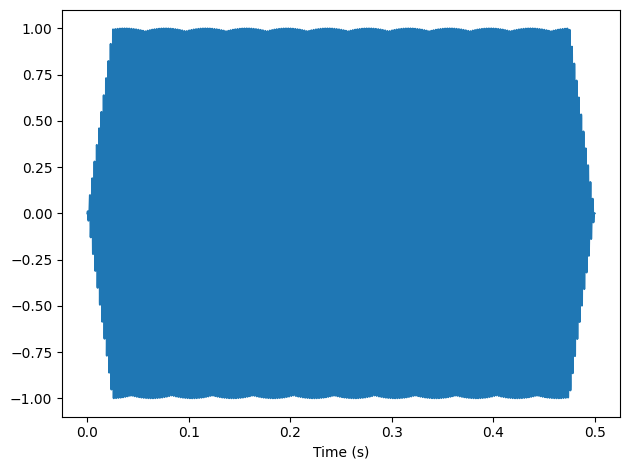

In [14]:
wave.normalize()
wave.apodize()

wave.plot()
decorate(xlabel="Time (s)")

In [15]:
# write a wave to a WAV file
wave.write("temp.wave")

Writing temp.wave


In [16]:
play_wave(filename="temp.wave", player="aplay")

In [ ]:
filename = '92002__jcveliz__violin-origional.wav'

if not os.path.exists(filename):
  !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/92002__jcveliz__violin-origional.wav

In [18]:
wave = read_wave(filename)
wave.make_audio()

I pulled out a segment of this recording where the pitch is constant.

When we plot the segment, we can't see the waveform clearly, but we can see the "envelope", which tracks the change in amplitude during the segment.

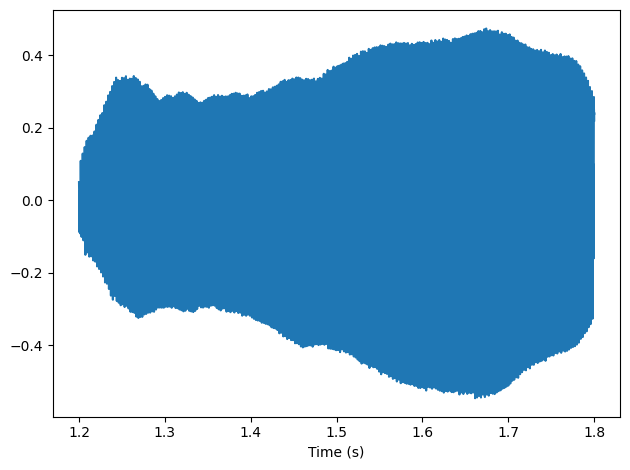

In [19]:
start = 1.2
duration = 0.6
segment = wave.segment(start, duration)
segment.plot()
decorate(xlabel="Time (s)")

##Spectral decomposition

Spectral decomposition, which is the idea that any signal can be expressed as the sum of sinusoids with different frequencies.

The most important mathematical idea is the discrete Fourier transform,
or DFT, which takes a signal and produces its spectrum. The spectrum is the
set of sinusoids that add up to produce the signal.

And the most important algorithm is the Fast Fourier transform, or
FFT, which is an efficient way to compute the DFT.



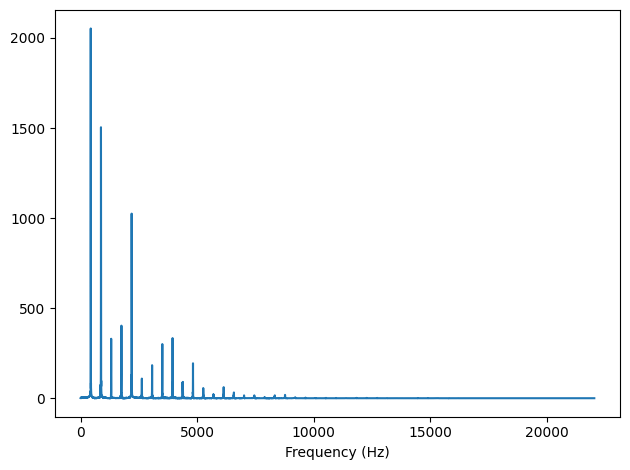

In [20]:
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel="Frequency (Hz)")

The lowest frequency component is called the fundamental frequency. The fundamental
frequency of this signal is near 440 Hz (actually a little lower, or “flat”).

In this signal the fundamental frequency has the largest amplitude, so it is also the
dominant frequency. Normally the perceived pitch of a sound is determined by the
fundamental frequency, even if it is not dominant.

The frequency components above 10 kHz are small. We can see the lower frequencies more clearly by providing an upper bound:

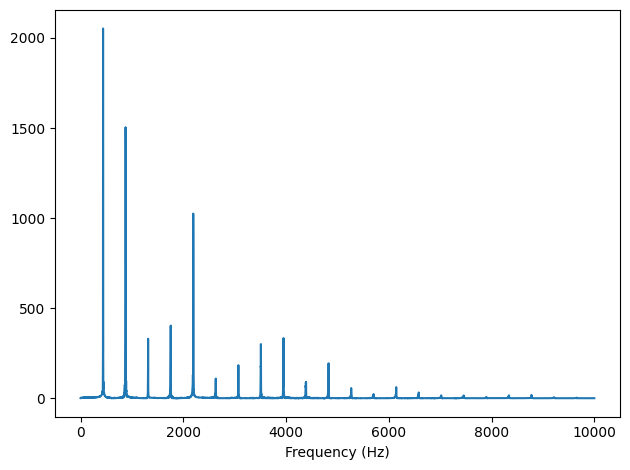

In [21]:
spectrum.plot(high=10000)
decorate(xlabel="Frequency (Hz)")

Spectrum provides `low_pass`, which applies a low pass filter; that is, it attenuates all frequency components above a cutoff frequency.

In [22]:
spectrum.low_pass(3000)

The result is a spectrum with fewer components.

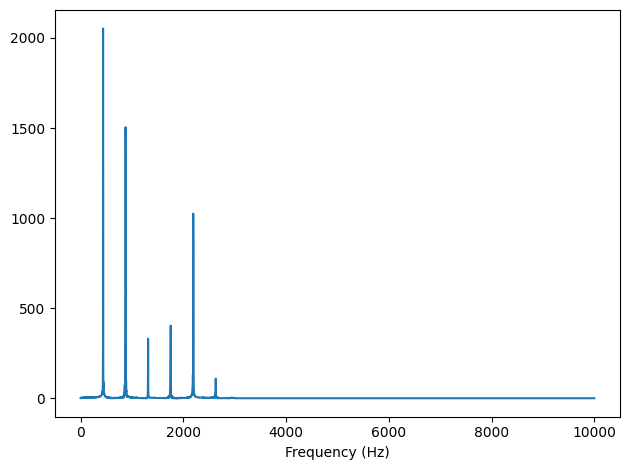

In [23]:
spectrum.plot(high=10000)
decorate(xlabel="Frequency (Hz)")

In [24]:
# We can convert the filtered spectrum back to a wave.
filtered = spectrum.make_wave()

# And then normalize it to the range -1 to 1.
filtered.normalize()

Before playing it back, I'll apodize it (to avoid clicks)

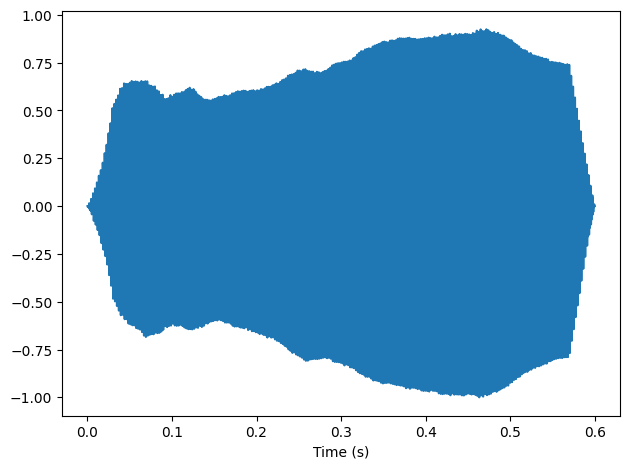

In [25]:
filtered.apodize()
filtered.plot()
decorate(xlabel="Time (s)")

And I'll do the same with the original segment.

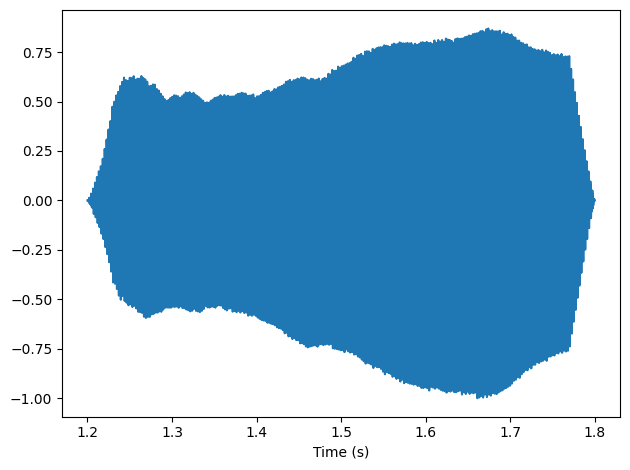

In [26]:
segment.normalize()
segment.apodize()
segment.plot()
decorate(xlabel="Time (s)")

Finally, we can listen to the original segment and the filtered version.

In [27]:
segment.make_audio()

In [28]:
filtered.make_audio()

The original sounds more complex, with some high-frequency components that sound buzzy. The filtered version sounds more like a pure tone, with a more muffled quality.

The cutoff frequency I chose, 3000 Hz, is similar to the quality of a telephone line, so this example simulates the sound of a violin recording played over a telephone.

##Interaction

The following shows the same example using interactive IPython widgets.

In [29]:
def filter_wave(wave, start, duration, cutoff):
  """
    Selects a segment from the wave and filters it.

    Plots the spectrum and displays an Audio widget.

    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
  """
  segment = wave.segment(start, duration)
  spectrum = segment.make_spectrum()

  spectrum.plot(color="0.7")
  spectrum.low_pass(cutoff)
  spectrum.plot()
  plt.xlabel("Frequency (Hz)")
  plt.show()

  audio = spectrum.make_wave().make_audio()
  display(audio)

Adjust the sliders to control the start and duration of the segment and the cutoff frequency applied to the spectrum.

In [30]:
wave = read_wave("92002__jcveliz__violin-origional.wav")
interact(filter_wave,
         wave=fixed(wave),
         start=(0, 5, 0.1),
         duration=(0, 5, 0.1),
         cutoff=(0, 10000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

##Exercise 1

Go to http://freesound.org and download a sound sample that includes music, speech, or other sounds that have a well-defined pitch. Select a roughly half-second segment where the pitch is constant. Compute and plot the spectrum of the segment you selected. What connection can you make between the timbre of the sound and the harmonic structure you see in the spectrum?

Use `high_pass`, `low_pass`, and `band_stop` to filter out some of the harmonics. Then convert the spectrum back to a wave and listen to it.

How does the sound relate to the changes you made in the spectrum?

In [ ]:
if not os.path.exists('170255__dublie__trumpet.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/170255__dublie__trumpet.wav

In [32]:
wave = read_wave("170255__dublie__trumpet.wav")
wave.normalize()
wave.make_audio()

Here's what the whole wave looks like:

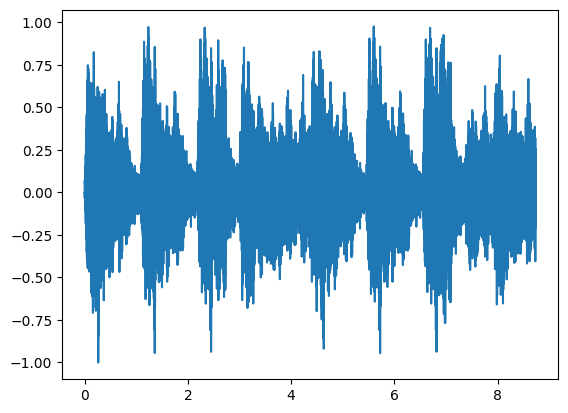

In [33]:
wave.plot()

By trial and error, I selected a segment with a constant pitch (although I believe it is a chord played by at least two horns).

In [36]:
segment = wave.segment(start=1.1, duration=0.3)
segment.make_audio()

Here's what the segment looks like:

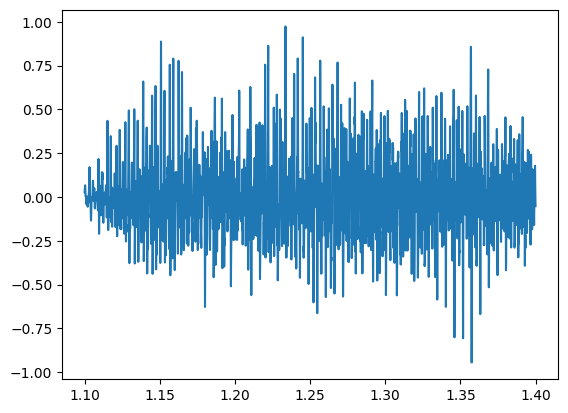

In [37]:
segment.plot()

In [38]:
segment = wave.segment(start=1.1, duration=1.3)
segment.make_audio()

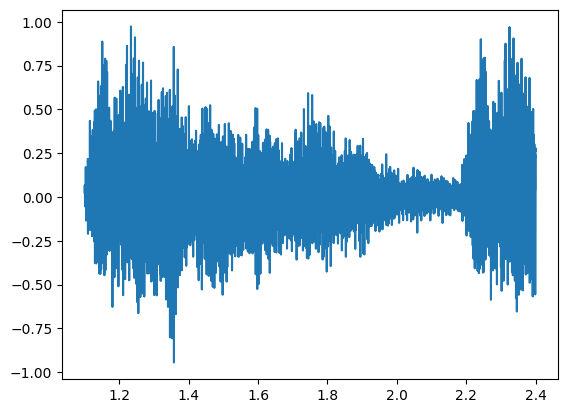

In [39]:
segment.plot()

And here's an even shorter segment so you can see the waveform:

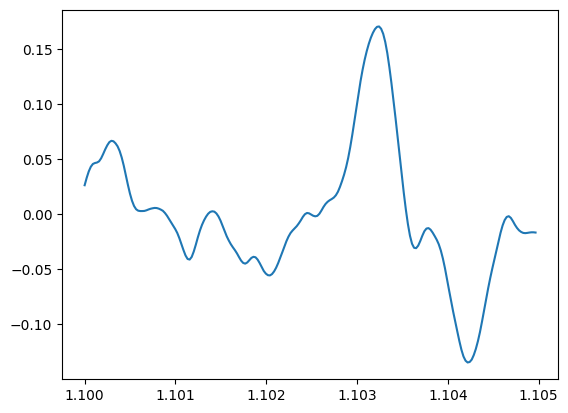

In [40]:
segment.segment(start=1.1, duration=0.005).plot()

Here's what the spectrum looks like:

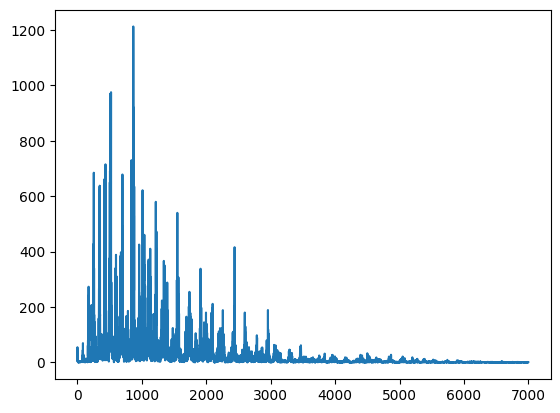

In [41]:
spectrum = segment.make_spectrum()
spectrum.plot(high=7000)

It has lots of frequency components.

Let's zoom in on the fundamental and dominant frequencies:

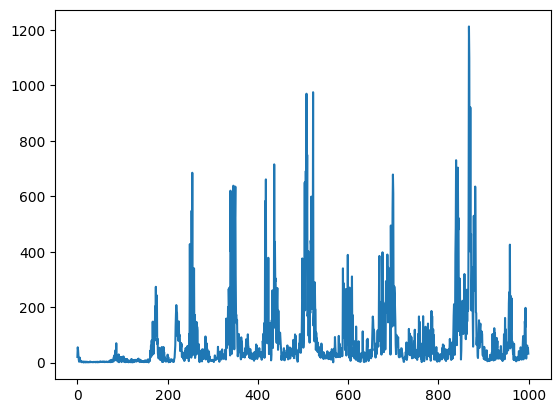

In [42]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1000)

`peaks` prints the highest points in the spectrum and their frequencies, in descending order:

In [43]:
spectrum.peaks()[:30]

[(1212.2179121294218, 867.6923076923076),
 (1098.0199368868387, 868.4615384615383),
 (975.0622917572443, 522.3076923076923),
 (969.663229508342, 507.6923076923076),
 (920.4581379784536, 870.7692307692307),
 (749.2742469078107, 509.23076923076917),
 (729.8763247418027, 839.2307692307692),
 (714.8824711387809, 436.15384615384613),
 (703.1091661965804, 843.076923076923),
 (690.8767683336636, 506.15384615384613),
 (684.6009352602225, 254.61538461538458),
 (678.2246236451045, 699.2307692307692),
 (660.6846162568395, 417.6923076923077),
 (649.8670498235689, 503.8461538461538),
 (637.810946271601, 345.38461538461536),
 (637.3167713523577, 346.15384615384613),
 (634.853248638412, 881.5384615384614),
 (634.5260603381793, 349.99999999999994),
 (621.3534429996135, 1011.5384615384614),
 (619.945836435076, 339.2307692307692),
 (610.2240188487023, 699.9999999999999),
 (598.7111673749432, 518.4615384615385),
 (582.4085262917303, 416.15384615384613),
 (579.6428864037769, 1216.923076923077),
 (557.8240

The dominant peak is at 870 Hz. It's not easy to dig out the fundamental, but with peaks at 507, 347, and 253 Hz, we can infer a fundamental at roughly 85 Hz, with harmonics at 170, 255, 340, 425, and 510 Hz.

85 Hz is close to F2 at 87 Hz. The pitch we perceive is usually the fundamental, even when it is not dominant. When you listen to this segment, what pitch(es) do you perceive?

Next we can filter out the high frequencies:

In [44]:
spectrum.low_pass(2000)

And here's what it sounds like:

In [45]:
spectrum.make_wave().make_audio()

The following interaction allows you to select a segment and apply different filters. If you set the cutoff to 3400 Hz, you can simulate what the sample would sound like over an old (not digital) phone line.

In [46]:
def filter_wave(wave, start, duration, cutoff):
  """
    Selects a segment from the wave and filters it.

    Plots the spectrum and displays an Audio widget.

    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
  """
  segment = wave.segment(start, duration)
  spectrum = segment.make_spectrum()

  spectrum.plot(high=5000, color="0.7")
  spectrum.low_pass(cutoff)
  spectrum.plot(high=5000, color="#045a8d")
  plt.xlabel("Frequency (Hz)")
  plt.show()

  audio = spectrum.make_wave().make_audio()
  display(audio)

In [47]:
interact(filter_wave,
         wave=fixed(wave),
         start=(0, 5, 0.1),
         duration=(0, 5, 0.1),
         cutoff=(0, 50000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

##Exercise 2

Synthesize a compound signal by creating `SinSignal` and `CosSignal` objects and adding them up. Evaluate the signal to get a Wave, and listen to it. Compute its Spectrum and plot it.

What happens if you add frequency components that are not multiples of the fundamental?

Here are some arbitrary components I chose. It makes an interesting waveform!